<a href="https://colab.research.google.com/github/fatumaahmed2024/AI-Coursework-2025/blob/main/MobilePriceRange_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving MobilePriceRange.csv to MobilePriceRange (1).csv


In [ ]:
df = pd.read_csv('MobilePriceRange.csv')
df.head()

,BatteryPower,InternalMemory,ClockSpeed,NoOfCores,RAM,TalkTime,DualSim,3G,4G,WiFi,...,MobileDepth,MobileWeight,TouchScreen,ScreenHeight,ScreenWidth,FrontCameraPx,RearCameraPX,PxHeight,PxWeight,PriceRange
0,842,7,2.2,2,2549,19,0,0,0,1,...,0.6,188,0,9,7,1,2,20,756,Medium
1,1021,53,0.5,3,2631,7,1,1,1,0,...,0.7,136,1,17,3,0,6,905,1988,High
2,563,41,0.5,5,2603,9,1,1,1,0,...,0.9,145,1,11,2,2,6,1263,1716,High
3,615,10,2.5,6,2769,11,0,1,0,0,...,0.8,131,0,16,8,0,9,1216,1786,High
4,1821,44,1.2,2,1411,15,0,1,1,0,...,0.6,141,1,8,2,13,14,1208,1212,Medium


In [ ]:
#Cleaning the data
df.isnull()


,BatteryPower,InternalMemory,ClockSpeed,NoOfCores,RAM,TalkTime,DualSim,3G,4G,WiFi,...,MobileDepth,MobileWeight,TouchScreen,ScreenHeight,ScreenWidth,FrontCameraPx,RearCameraPX,PxHeight,PxWeight,PriceRange
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1996,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1997,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1998,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


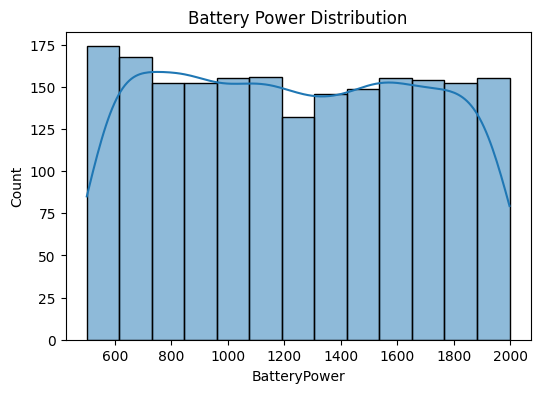

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
#Insight 1: Distribution of battery power
plt.figure(figsize=(6,4))
sns.histplot(df['BatteryPower'], kde=True)
plt.title("Battery Power Distribution")
plt.show()

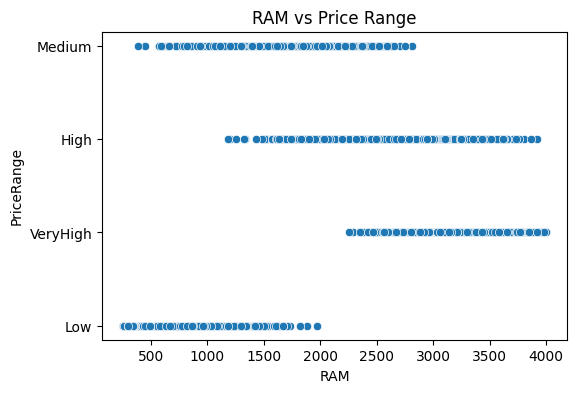

In [ ]:
# Insight 2: How RAM affects price
plt.figure(figsize=(6,4))
sns.scatterplot(x=df['RAM'], y=df['PriceRange'])
plt.title("RAM vs Price Range")
plt.show()

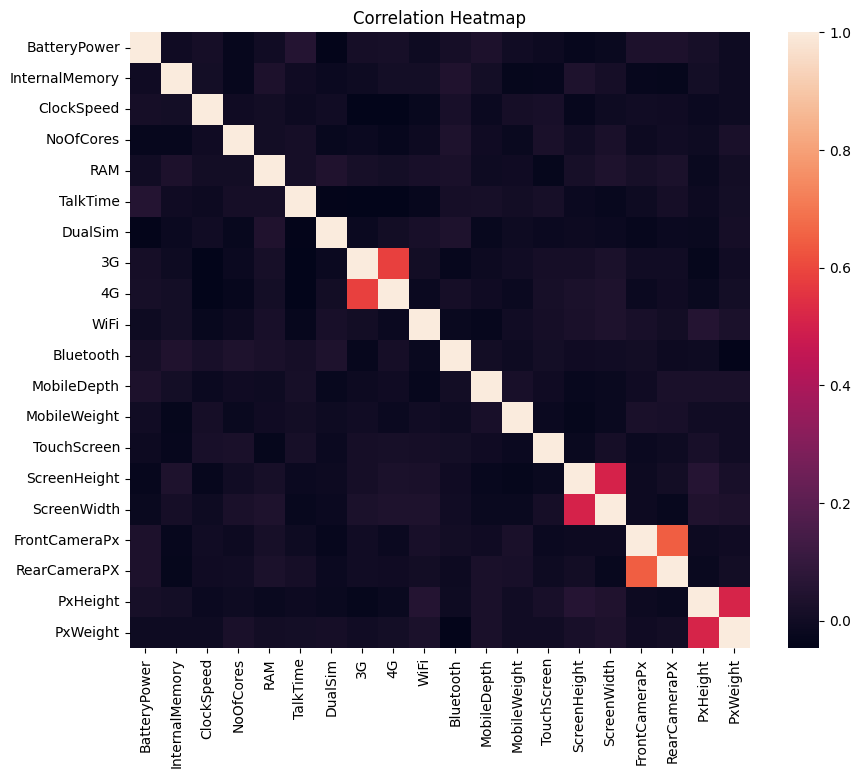

In [ ]:
# Insight 3: Correlation heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df.drop('PriceRange', axis=1).corr(), annot=False)
plt.title("Correlation Heatmap")
plt.show()

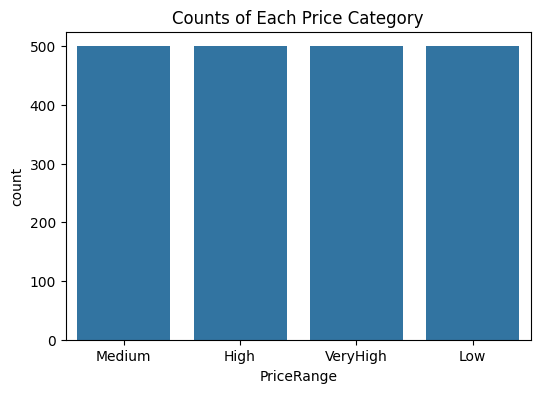

In [ ]:
# Insight 4: Count of price categories
plt.figure(figsize=(6,4))
sns.countplot(x=df['PriceRange'])
plt.title("Counts of Each Price Category")
plt.show()

In [ ]:
# Choose features and target
features = ['RAM', 'BatteryPower']
X = df[features]
y = df['PriceRange']

In [ ]:
from sklearn.model_selection import train_test_split
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

acc_scores = []
k_values = range(1, 21)

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    preds = knn.predict(X_test)
    acc_scores.append(accuracy_score(y_test, preds))

    # Find best k
best_k = k_values[np.argmax(acc_scores)]
best_k

9

KNN Accuracy: 0.804


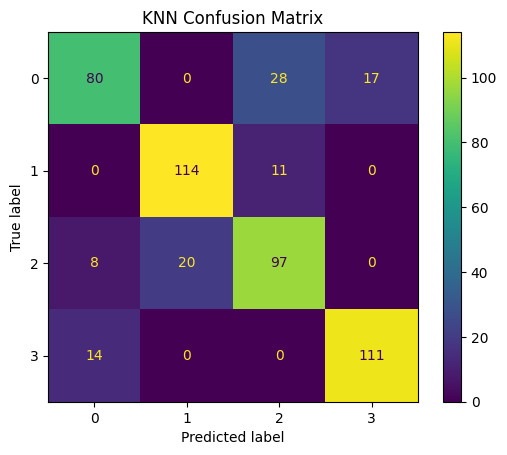

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

#Train Final KNN Model with Best k
knn_final = KNeighborsClassifier(n_neighbors=best_k)
knn_final.fit(X_train, y_train)
y_pred_knn = knn_final.predict(X_test)

# Accuracy and confusion matrix
acc_knn = accuracy_score(y_test, y_pred_knn)
cm_knn = confusion_matrix(y_test, y_pred_knn)

print("KNN Accuracy:", acc_knn)

ConfusionMatrixDisplay(cm_knn).plot()
plt.title("KNN Confusion Matrix")
plt.show()

Baseline SVM Accuracy: 0.798


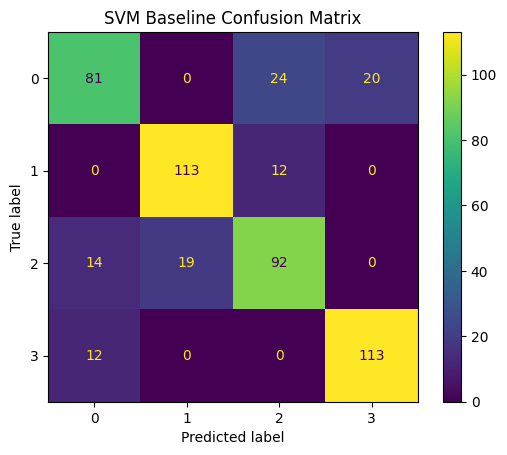

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

#SVM Eager Learner
svm_base = SVC(kernel='linear', random_state=42)
svm_base.fit(X_train, y_train)

y_pred_svm = svm_base.predict(X_test)

acc_svm = accuracy_score(y_test, y_pred_svm)
cm_svm = confusion_matrix(y_test, y_pred_svm)

print("Baseline SVM Accuracy:", acc_svm)

ConfusionMatrixDisplay(cm_svm).plot()
plt.title("SVM Baseline Confusion Matrix")
plt.show()

Best parameters (reduced grid): {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
SVM (tuned, reduced grid) Accuracy: 0.786


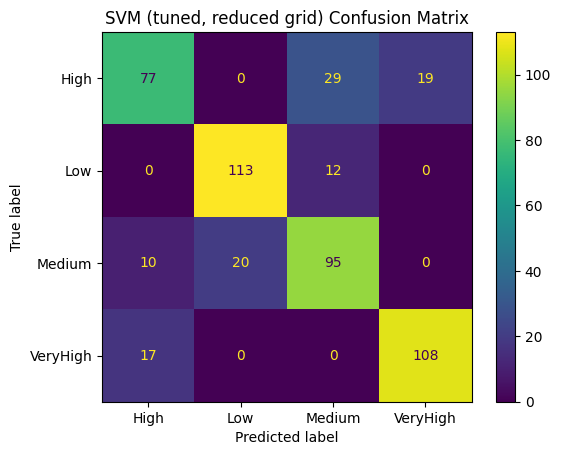

,Model,Accuracy
0,KNN (best k),0.804
1,SVM Baseline,0.798
2,SVM Tuned (reduced grid),0.786


In [21]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def eval_and_plot(y_true, y_pred, labels, title):
    acc = accuracy_score(y_true, y_pred)
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    print(f"{title} Accuracy: {acc}")
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    disp.plot()
    plt.title(title + " Confusion Matrix")
    plt.show()
    return acc, cm

param_grid = {
    'C': [1, 10],
    'kernel': ['rbf'],
    'gamma': ['scale']
}
svm_tuned_reduced = GridSearchCV(SVC(random_state=42), param_grid, cv=3, scoring='accuracy', n_jobs=-1)
svm_tuned_reduced.fit(X_train, y_train)
print('Best parameters (reduced grid):', svm_tuned_reduced.best_params_)

y_pred_svm_tuned_reduced = svm_tuned_reduced.best_estimator_.predict(X_test)
acc_svm_tuned_reduced, cm_svm_tuned_reduced = eval_and_plot(y_test, y_pred_svm_tuned_reduced, labels=np.unique(y), title='SVM (tuned, reduced grid)')

# Compare All Models with the successful reduced grid tuning
results = pd.DataFrame(
    {'Model': ['KNN (best k)', 'SVM Baseline', 'SVM Tuned (reduced grid)'],
    'Accuracy': [acc_knn, acc_svm, acc_svm_tuned_reduced]}
)

display(results)

In [23]:
# CELL 11 — Evaluation of KNN, Baseline SVM, and Tuned SVM (Q6)

from sklearn.metrics import confusion_matrix, accuracy_score

print("=== MODEL EVALUATION (Q6) ===\n")

# 1️ Evaluate KNN (From Q3)
print("KNN Model Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))
print("\n---------------------------------------\n")

# 2️ Evaluate Baseline SVM (From Q4)
print("Baseline SVM Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))
print("\n---------------------------------------\n")

# 3️ Evaluate Tuned SVM (From Q5)
print("Tuned SVM Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_svm_tuned_reduced))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm_tuned_reduced))
print("\n---------------------------------------\n")

print("Evaluation Complete.")

=== MODEL EVALUATION (Q6) ===

KNN Model Results:
Accuracy: 0.804
Confusion Matrix:
 [[ 80   0  28  17]
 [  0 114  11   0]
 [  8  20  97   0]
 [ 14   0   0 111]]

---------------------------------------

Baseline SVM Results:
Accuracy: 0.798
Confusion Matrix:
 [[ 81   0  24  20]
 [  0 113  12   0]
 [ 14  19  92   0]
 [ 12   0   0 113]]

---------------------------------------

Tuned SVM Results:
Accuracy: 0.786
Confusion Matrix:
 [[ 77   0  29  19]
 [  0 113  12   0]
 [ 10  20  95   0]
 [ 17   0   0 108]]

---------------------------------------

Evaluation Complete.
